In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../course_notebooks/DATA/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

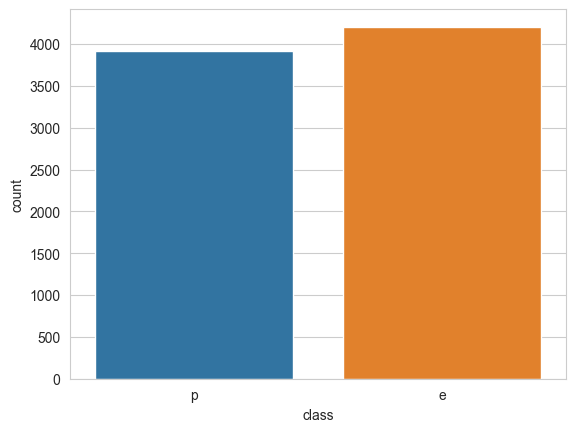

In [2]:
sns.countplot(df,x='class')

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


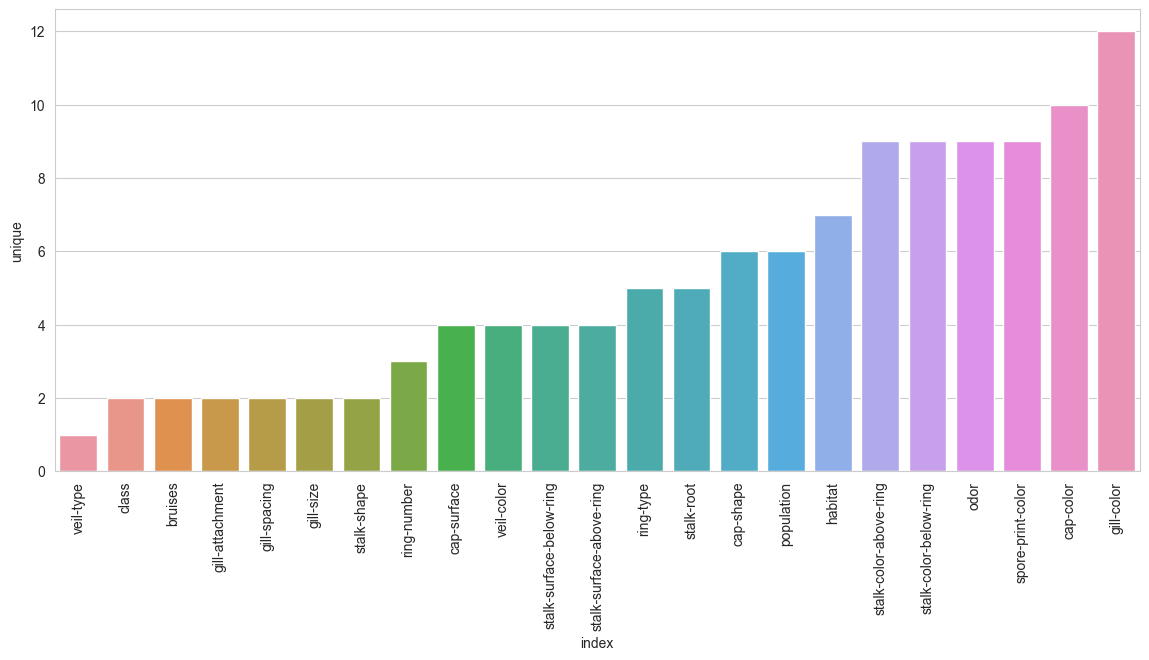

In [4]:
unique_features = df.describe().transpose().reset_index().sort_values('unique')[['index','unique']]
plt.figure(figsize=(14,6))
sns.barplot(unique_features,x='index',y='unique')
plt.xticks(rotation=90);

In [5]:
x = pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y = df['class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=101)

In [6]:
from sklearn.ensemble import AdaBoostClassifier
abc_model = AdaBoostClassifier(n_estimators=1)
abc_model.fit(x_train,y_train)
stump_predictions = abc_model.predict(x_test)

In [7]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
print(classification_report(y_test,stump_predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [8]:
feature_importances = pd.DataFrame(data=abc_model.feature_importances_,columns=['importance'])
feature_importances['feature']=pd.Series(x.columns)
feature_importances.sort_values('importance',ascending=False)

,importance,feature
22,1.0,odor_n
0,0.0,cap-shape_c
71,0.0,ring-number_t
69,0.0,veil-color_y
68,0.0,veil-color_w
...,...,...
30,0.0,gill-color_g
29,0.0,gill-color_e
28,0.0,gill-size_n
27,0.0,gill-spacing_w


In [9]:
abc_model.feature_importances_.argmax() # index of the most important feature

22

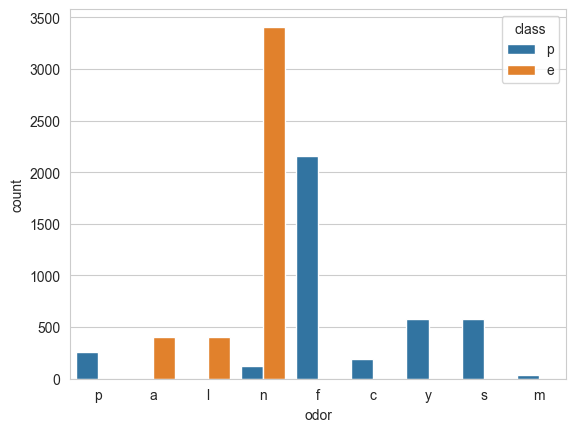

In [10]:
sns.countplot(data=df,x='odor',hue='class');

In [11]:
error_rates = []
for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    err = 1-accuracy_score(y_test,preds)
    error_rates.append(err)

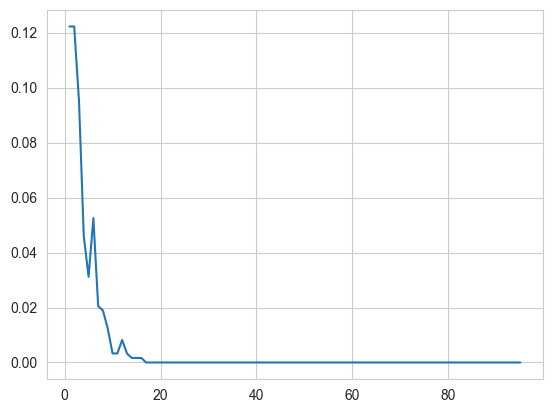

In [12]:
plt.plot(range(1,96),error_rates);

In [13]:
features = pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=['importance']).sort_values('importance')
features = features[features['importance']>0]

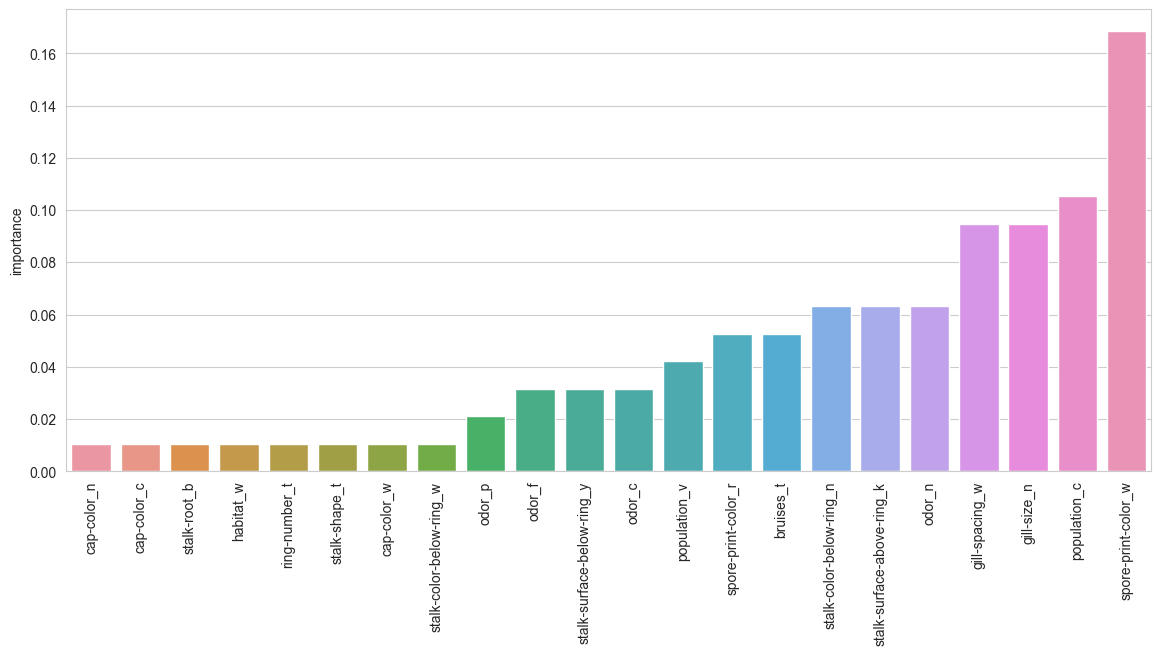

In [14]:
plt.figure(figsize=(14,6))
sns.barplot(features,x=features.index,y='importance')
plt.xticks(rotation=90);

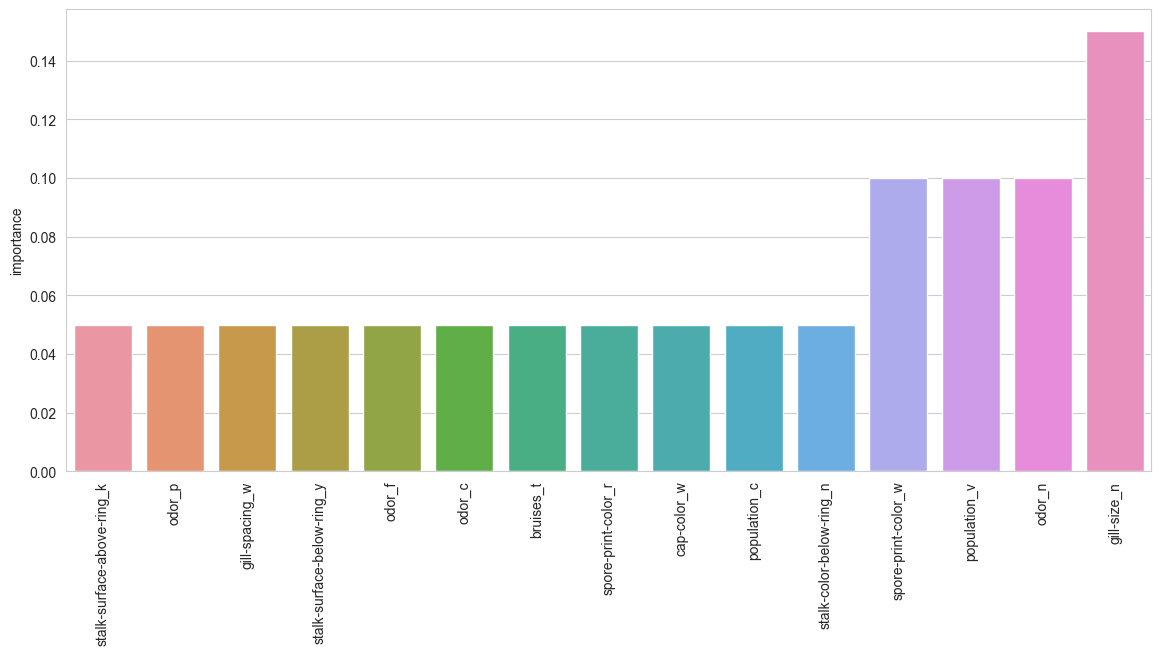

In [15]:
model = AdaBoostClassifier(n_estimators=20)
model.fit(x_train,y_train)
features = pd.DataFrame(index=x.columns,data=model.feature_importances_,columns=['importance']).sort_values('importance')
features = features[features['importance']>0]
plt.figure(figsize=(14,6))
sns.barplot(features,x=features.index,y='importance')
plt.xticks(rotation=90);

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()

param_grid = {'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]}
grid = GridSearchCV(model,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [17]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [18]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
predictions = grid.predict(x_test)

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



F:\Dev\python\course\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


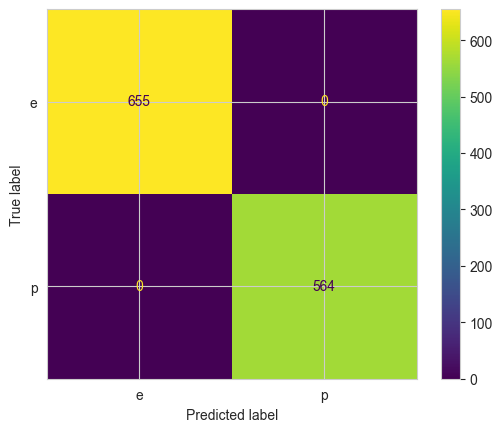

In [20]:
plot_confusion_matrix(grid,x_test,y_test)

In [21]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 8.44001120e-17, 0.00000000e+00, 0.00000000e+00,
       9.87830182e-17, 1.04524302e-03, 6.84975961e-18, 5.06011038e-06,
       8.43571457e-18, 0.00000000e+00, 0.00000000e+00, 2.57470199e-18,
       2.31212631e-18, 0.00000000e+00, 0.00000000e+00, 7.74665739e-05,
       2.42084559e-03, 5.44539637e-02, 1.84253604e-04, 1.03253949e-02,
       1.82499853e-02, 1.98383484e-05, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27126988e-02,
       1.04355233e-02, 0.00000000e+00, 4.04238778e-16, 0.00000000e+00,
       1.85041481e-17, 0.00000000e+00, 0.00000000e+00, 1.35850951e-17,
       0.00000000e+00, 0.00000000e+00, 3.45270165e-17, 0.00000000e+00,
       0.00000000e+00, 2.92091629e-04, 1.36013926e-01, 7.71855052e-03,
       1.63039003e-02, 4.65375385e-04, 2.59960003e-04, 4.95063766e-06,
       0.00000000e+00, 0.00000000e+00, 4.98341218e-02, 1.16310299e-04,
       0.00000000e+00, 0.00000000e+00, 1.23050746e-03, 0.00000000e+00,
      

In [45]:
features = pd.DataFrame(index=x.columns,data=grid.best_estimator_.feature_importances_,columns=['importance']).sort_values('importance')
features = features[features['importance']>=features.quantile([.75]).loc[0.75][0]]

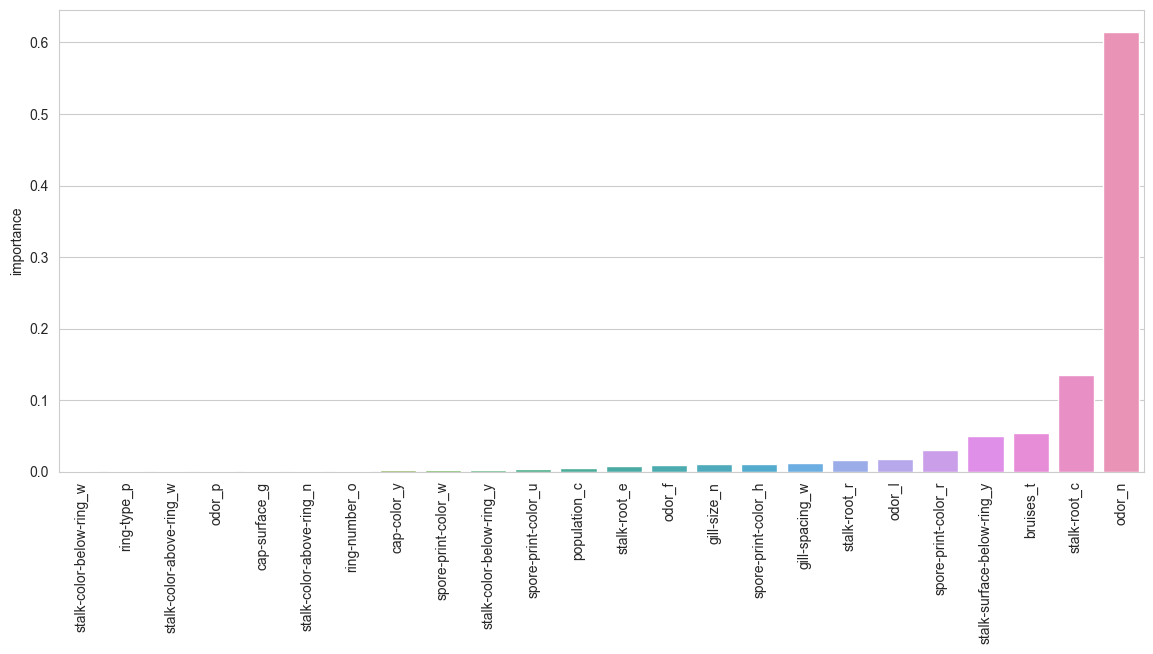

In [46]:
plt.figure(figsize=(14,6))
sns.barplot(features,x=features.index,y='importance')
plt.xticks(rotation=90);
